In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv(r"C:\Users\lvv49\Desktop\Rain in Au\archive\weatherAUS.csv")


darwin=data["Location"]=="Darwin"

darwin_data=data[darwin]
darwin_data.info()
darwin_data.shape
darwin_data.describe()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 3193 entries, 139111 to 142303
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3193 non-null   object 
 1   Location       3193 non-null   object 
 2   MinTemp        3192 non-null   float64
 3   MaxTemp        3192 non-null   float64
 4   Rainfall       3193 non-null   float64
 5   Evaporation    3139 non-null   float64
 6   Sunshine       3189 non-null   float64
 7   WindGustDir    3147 non-null   object 
 8   WindGustSpeed  3151 non-null   float64
 9   WindDir9am     3165 non-null   object 
 10  WindDir3pm     3190 non-null   object 
 11  WindSpeed9am   3191 non-null   float64
 12  WindSpeed3pm   3191 non-null   float64
 13  Humidity9am    3192 non-null   float64
 14  Humidity3pm    3191 non-null   float64
 15  Pressure9am    3192 non-null   float64
 16  Pressure3pm    3191 non-null   float64
 17  Cloud9am       3192 non-null   float64
 18  C

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3192.000000,3192.000000,3193.000000,3139.000000,3189.00000,3151.000000,3191.000000,3191.000000,3192.000000,3191.000000,3192.000000,3191.000000,3192.000000,3190.000000,3193.000000,3191.000000
mean,23.209305,32.540977,5.092452,6.318668,8.49931,40.582355,15.009088,20.831401,68.486216,51.827954,1011.888784,1008.349107,4.337093,4.310345,27.185625,31.082733
std,2.968970,1.746054,16.450148,1.869214,3.20916,10.021855,6.881139,6.016469,15.042251,18.701605,3.354855,2.909659,2.554531,2.578511,2.727536,2.090846
min,12.500000,21.900000,0.000000,0.200000,0.00000,15.000000,0.000000,0.000000,11.000000,5.000000,996.300000,996.000000,0.000000,0.000000,16.700000,19.000000
25%,21.600000,31.600000,0.000000,5.200000,7.00000,33.000000,9.000000,17.000000,62.000000,39.000000,1009.600000,1006.400000,2.000000,2.000000,25.500000,29.900000
50%,23.900000,32.800000,0.000000,6.400000,10.00000,39.000000,15.000000,20.000000,71.000000,53.000000,1012.200000,1008.600000,5.000000,5.000000,27.800000,31.500000
75%,25.300000,33.700000,1.800000,7.600000,10.90000,46.000000,19.000000,24.000000,78.000000,64.000000,1014.400000,1010.500000,7.000000,7.000000,29.300000,32.600000
max,29.700000,38.000000,367.600000,19.200000,12.30000,126.000000,63.000000,52.000000,99.000000,99.000000,1019.300000,1015.400000,8.000000,8.000000,32.200000,37.400000


In [2]:
darwin_data["Date"]=pd.to_datetime(darwin_data["Date"])
darwin_data.info()
print(darwin_data.head)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3193 entries, 139111 to 142303
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           3193 non-null   datetime64[ns]
 1   Location       3193 non-null   object        
 2   MinTemp        3192 non-null   float64       
 3   MaxTemp        3192 non-null   float64       
 4   Rainfall       3193 non-null   float64       
 5   Evaporation    3139 non-null   float64       
 6   Sunshine       3189 non-null   float64       
 7   WindGustDir    3147 non-null   object        
 8   WindGustSpeed  3151 non-null   float64       
 9   WindDir9am     3165 non-null   object        
 10  WindDir3pm     3190 non-null   object        
 11  WindSpeed9am   3191 non-null   float64       
 12  WindSpeed3pm   3191 non-null   float64       
 13  Humidity9am    3192 non-null   float64       
 14  Humidity3pm    3191 non-null   float64       
 15  Pressure9am   

C:\Users\lvv49\AppData\Local\Temp/ipykernel_10172/746221517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  darwin_data["Date"]=pd.to_datetime(darwin_data["Date"])


In [3]:
def replace_numerical(data):
    for col in data.select_dtypes(['int','float']):
        data[col]=data[col].fillna(data[col].median())
    return data

def replace_object(data):
    for col in data.select_dtypes('object'):
        data[col]=data[col].fillna(method='ffill')
    return data

In [4]:
darwin_data=replace_numerical(darwin_data)
darwin_data=replace_object(darwin_data)

C:\Users\lvv49\AppData\Local\Temp/ipykernel_10172/808116504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col]=data[col].fillna(data[col].median())
C:\Users\lvv49\AppData\Local\Temp/ipykernel_10172/808116504.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col]=data[col].fillna(method='ffill')


In [5]:
darwin_data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [6]:
darwin_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3193 entries, 139111 to 142303
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           3193 non-null   datetime64[ns]
 1   Location       3193 non-null   object        
 2   MinTemp        3193 non-null   float64       
 3   MaxTemp        3193 non-null   float64       
 4   Rainfall       3193 non-null   float64       
 5   Evaporation    3193 non-null   float64       
 6   Sunshine       3193 non-null   float64       
 7   WindGustDir    3193 non-null   object        
 8   WindGustSpeed  3193 non-null   float64       
 9   WindDir9am     3193 non-null   object        
 10  WindDir3pm     3193 non-null   object        
 11  WindSpeed9am   3193 non-null   float64       
 12  WindSpeed3pm   3193 non-null   float64       
 13  Humidity9am    3193 non-null   float64       
 14  Humidity3pm    3193 non-null   float64       
 15  Pressure9am   

EDA and Visualisations

<AxesSubplot:>

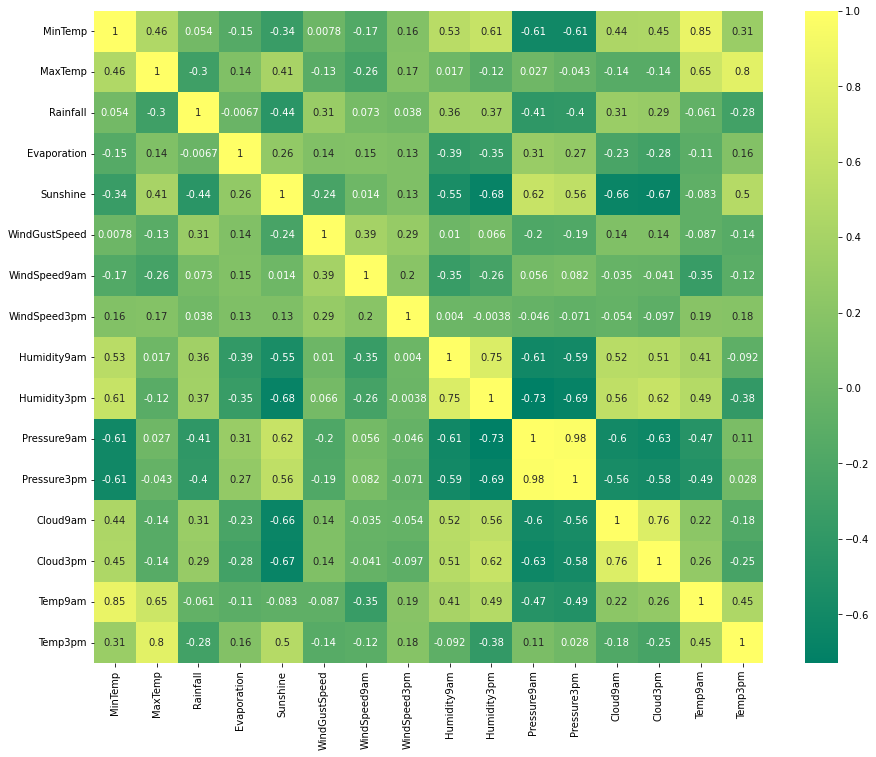

In [7]:
corr=darwin_data.corr()
plt.figure(figsize=(15,12))

sns.heatmap(corr,cmap='summer',annot=True)

Observation:-

MaxTemp and Temp3pm have a strong positive correlation
Pressure9am and Pressure3pm have a strong positive correlation
MinTemp and Temp9am have a strong positive correlation of

Text(0.5, 1.0, 'Distribution of max temperature')

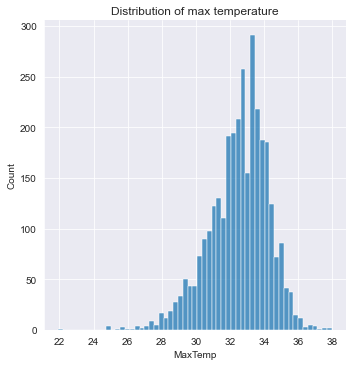

In [8]:
# Distribution of max temperature
sns.set_style('darkgrid')
sns.displot(darwin_data["MaxTemp"])
plt.title("Distribution of max temperature")

Text(0.5, 1.0, 'Distribution of min temperature')

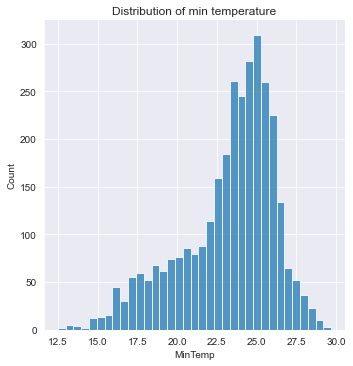

In [9]:
sns.set_style('darkgrid')
sns.displot(darwin_data["MinTemp"])
plt.title("Distribution of min temperature")

Observation:-

Highest concentration of points for minimum temperature is between 25-27.5 degree Celcius.
Highest concentration of points for maximum temperature is between 32-34 degree Celcius.

In [10]:
darwin_data['Year']=pd.to_datetime(darwin_data.Date).dt.year
darwin_data['Month']=pd.to_datetime(darwin_data.Date).dt.month
darwin_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3193 entries, 139111 to 142303
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           3193 non-null   datetime64[ns]
 1   Location       3193 non-null   object        
 2   MinTemp        3193 non-null   float64       
 3   MaxTemp        3193 non-null   float64       
 4   Rainfall       3193 non-null   float64       
 5   Evaporation    3193 non-null   float64       
 6   Sunshine       3193 non-null   float64       
 7   WindGustDir    3193 non-null   object        
 8   WindGustSpeed  3193 non-null   float64       
 9   WindDir9am     3193 non-null   object        
 10  WindDir3pm     3193 non-null   object        
 11  WindSpeed9am   3193 non-null   float64       
 12  WindSpeed3pm   3193 non-null   float64       
 13  Humidity9am    3193 non-null   float64       
 14  Humidity3pm    3193 non-null   float64       
 15  Pressure9am   

C:\Users\lvv49\AppData\Local\Temp/ipykernel_10172/1663074773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  darwin_data['Year']=pd.to_datetime(darwin_data.Date).dt.year
C:\Users\lvv49\AppData\Local\Temp/ipykernel_10172/1663074773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  darwin_data['Month']=pd.to_datetime(darwin_data.Date).dt.month


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

<Figure size 576x288 with 0 Axes>

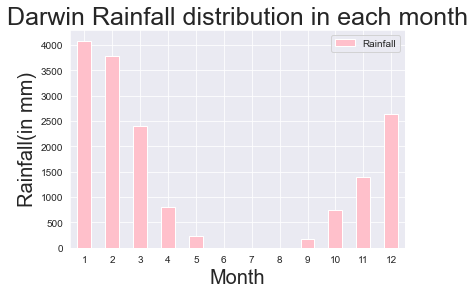

In [11]:
plt.figure(figsize=(8,4))
a=darwin_data.groupby('Month').agg({'Rainfall':'sum'})
a.plot(kind='bar',color='pink')
plt.title('Darwin Rainfall distribution in each month',fontsize=25)
plt.xlabel('Month',fontsize=20)
plt.ylabel("Rainfall(in mm)",fontsize=20)
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2008'),
  Text(1, 0, '2009'),
  Text(2, 0, '2010'),
  Text(3, 0, '2011'),
  Text(4, 0, '2012'),
  Text(5, 0, '2013'),
  Text(6, 0, '2014'),
  Text(7, 0, '2015'),
  Text(8, 0, '2016'),
  Text(9, 0, '2017')])

<Figure size 576x288 with 0 Axes>

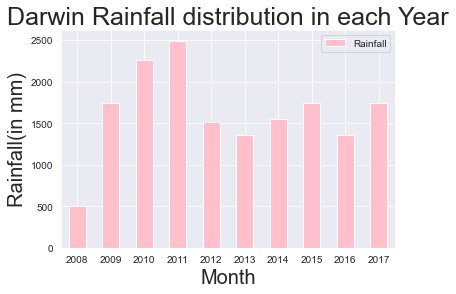

In [17]:
plt.figure(figsize=(8,4))
a=darwin_data.groupby('Year').agg({'Rainfall':'sum'})
a.plot(kind='bar',color='pink')
plt.title('Darwin Rainfall distribution in each Year',fontsize=25)
plt.xlabel('Month',fontsize=20)
plt.ylabel("Rainfall(in mm)",fontsize=20)
plt.xticks(rotation=0)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 576x288 with 0 Axes>

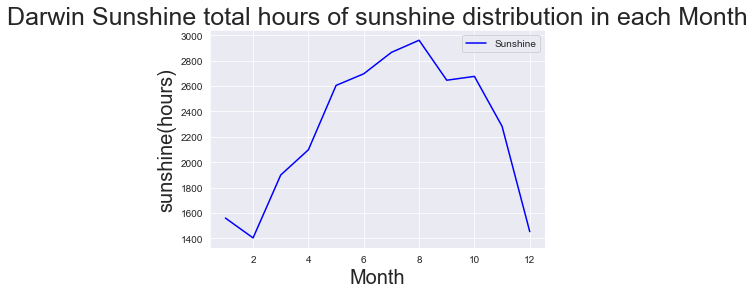

In [22]:
plt.figure(figsize=(8,4))
a=darwin_data.groupby('Month').agg({'Sunshine':'sum'})
a.plot(kind='line',color='blue')
plt.title('Darwin Sunshine total hours of sunshine distribution in each Month',fontsize=25)
plt.xlabel('Month',fontsize=20)
plt.ylabel("sunshine(hours)",fontsize=20)
plt.xticks(rotation=0)